# Maximum Weight Stable Set

## Problem definition

Given a simple undirected graph $G=(V,E)$ and weights $w \in \mathbb{R}^V$, the problem is to find a stable set $S \subseteq V$ that maximizes $\sum_{v \in V} w_v$. We recall that a subset $S \subseteq V$ is a *stable set* if no two vertices of $S$ are adjacent. This is one of Karp's 21 NP-complete problems.

## Random instance generator

The class `MaxWeightStableSetGenerator` can be used to generate random instances of this problem, with user-specified probability distributions. When the constructor parameter `fix_graph=True` is provided, one random Erdős-Rényi graph $G_{n,p}$ is generated during the constructor, where $n$ and $p$ are sampled from user-provided probability distributions `n` and `p`. To generate each instance, the generator independently samples each $w_v$ from the user-provided probability distribution `w`. When `fix_graph=False`, a new random graph is generated for each instance, while the remaining parameters are sampled in the same way.

## Challenge A

* Fixed random Erdős-Rényi graph $G_{n,p}$ with $n=200$ and $p=5\%$
* Random vertex weights $w_v \sim U(100, 125)$
* 512 training instances, 64 test instances

CPU times: user 43.6 s, sys: 1min 42s, total: 2min 25s
Wall time: 1min 56s


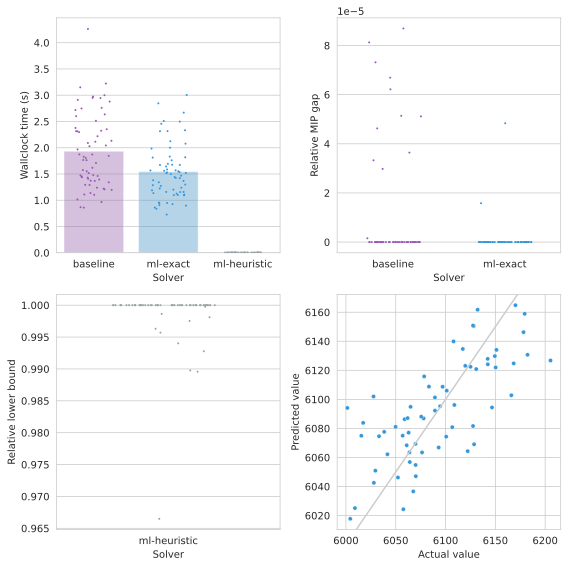

In [1]:
%%time
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

from miplearn.benchmark import run_benchmarks
from miplearn.problems.stab import MaxWeightStableSetGenerator
from scipy.stats import uniform, randint

instances = MaxWeightStableSetGenerator(
    w=uniform(loc=100.0, scale=25.0),
    n=randint(low=150, high=151),
    p=uniform(loc=0.05, scale=0.0),
    fix_graph=True,
).generate(576)

run_benchmarks(
    train_instances = instances[:512],
    test_instances = instances[512:],
    n_jobs=16,
);